In [5]:
#----------------MODEL NUMBER 2------------------------------------#

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import pickle
plt.style.use('bmh')

#This is our base dataset for adoni market
market = pd.read_csv("merged_agmarknet_adoni_market.csv")
print(market.head)

<bound method NDFrame.head of                State District Market Commodity        Variety Arrival_Date  \
0     Andhra Pradesh  Kurnool  Adoni    Cotton          Other   01-07-2002   
1     Andhra Pradesh  Kurnool  Adoni    Cotton          Other   02-07-2002   
2     Andhra Pradesh  Kurnool  Adoni    Cotton          Other   03-07-2002   
3     Andhra Pradesh  Kurnool  Adoni    Cotton          Other   04-07-2002   
4     Andhra Pradesh  Kurnool  Adoni    Cotton          Other   05-07-2002   
...              ...      ...    ...       ...            ...          ...   
5810  Andhra Pradesh  Kurnool  Adoni    Cotton  Kapas (Adoni)   23-12-2024   
5811  Andhra Pradesh  Kurnool  Adoni    Cotton  Kapas (Adoni)   24-12-2024   
5812  Andhra Pradesh  Kurnool  Adoni    Cotton  Kapas (Adoni)   26-12-2024   
5813  Andhra Pradesh  Kurnool  Adoni    Cotton  Kapas (Adoni)   27-12-2024   
5814  Andhra Pradesh  Kurnool  Adoni    Cotton  Kapas (Adoni)   28-12-2024   

      Min Price  Max Price  Modal

In [7]:
kapas = market.loc[market['Variety'] == 'Kapas (Adoni)']
print(kapas)

               State District Market Commodity        Variety Arrival_Date  \
430   Andhra Pradesh  Kurnool  Adoni    Cotton  Kapas (Adoni)   27-09-2004   
452   Andhra Pradesh  Kurnool  Adoni    Cotton  Kapas (Adoni)   01-11-2004   
453   Andhra Pradesh  Kurnool  Adoni    Cotton  Kapas (Adoni)   02-11-2004   
454   Andhra Pradesh  Kurnool  Adoni    Cotton  Kapas (Adoni)   06-11-2004   
455   Andhra Pradesh  Kurnool  Adoni    Cotton  Kapas (Adoni)   08-11-2004   
...              ...      ...    ...       ...            ...          ...   
5810  Andhra Pradesh  Kurnool  Adoni    Cotton  Kapas (Adoni)   23-12-2024   
5811  Andhra Pradesh  Kurnool  Adoni    Cotton  Kapas (Adoni)   24-12-2024   
5812  Andhra Pradesh  Kurnool  Adoni    Cotton  Kapas (Adoni)   26-12-2024   
5813  Andhra Pradesh  Kurnool  Adoni    Cotton  Kapas (Adoni)   27-12-2024   
5814  Andhra Pradesh  Kurnool  Adoni    Cotton  Kapas (Adoni)   28-12-2024   

      Min Price  Max Price  Modal Price  
430         869      

In [8]:
kapas = kapas[['Arrival_Date','Min Price','Max Price','Modal Price']]

#Dataset after 2500 rows is continuous i.e very less dates are missing
#DATA FROM YEAR 2011
kapas = kapas.loc[2500: , :]
kapas.reset_index(drop=True)
kapas.set_index('Arrival_Date')
# kapas['Arrival_Date'] = pd.to_datetime(kapas['Arrival_Date'])
kapas

,Arrival_Date,Min Price,Max Price,Modal Price
2500,30-10-2010,3000,4439,4200
2501,31-10-2010,3000,4439,4200
2502,01-11-2010,2061,4291,4050
2503,02-11-2010,2061,4291,4050
2504,03-11-2010,2500,4365,4100
...,...,...,...,...
5810,23-12-2024,4908,7219,7089
5811,24-12-2024,5408,7220,7089
5812,26-12-2024,4989,7272,7149
5813,27-12-2024,5000,7285,7151


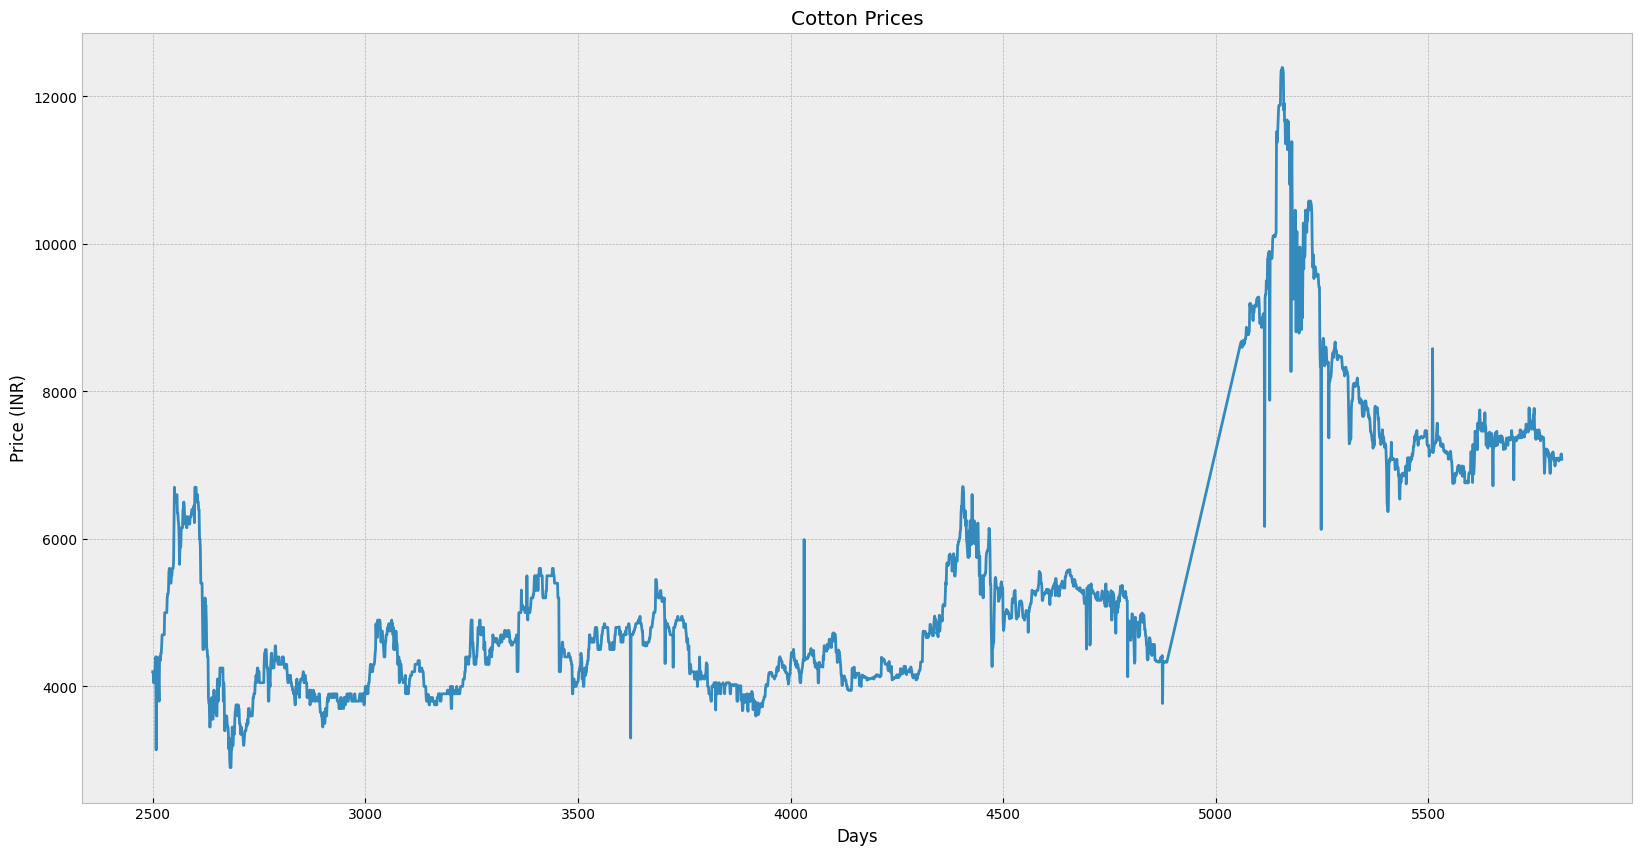

In [9]:
plt.figure(figsize=(20,10))
plt.plot(kapas["Modal Price"])
# plt.plot(kapas["Min Price"])
# plt.plot(kapas["Max Price"])
plt.title('Cotton Prices')
plt.ylabel('Price (INR)')
plt.xlabel('Days')
# plt.legend(['Modal Price', 'Min Price', 'Max Price'], loc='upper right')
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [11]:
kapas_modal = kapas.iloc[:, 3:].values
training_set, test_set = train_test_split(kapas_modal, train_size=0.8, test_size=0.2, shuffle=False)

In [12]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [13]:
X_train = []
y_train = []
for i in range(60, 1892):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [15]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 25))
regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0076
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 6.4612e-04
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 5.3215e-04
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 5.6278e-04
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 5.2052e-04
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 4.6102e-04
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 4.0301e-04
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 3.8323e-04
Epoch 9/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 3.6377e-04
Epoch 10/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 3.1049e-04
Epoch 11/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 3.1507e-04
Epoch 12/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 4.0920e-04
Epoch 13/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 3.1690e-04
Epoch 14/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 2.9092e-04
Epoch

In [16]:
#saving model to disk
pickle.dump(regressor, open('model2.pkl', 'wb'))

In [19]:
# #------CODE FOR CHECKING IF MODEL IS UNDERFITTED OR OVERFITTED---------

# history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_data = 0.33)

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model train vs validation loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper right')
# plt.show()

In [20]:
model = pickle.load(open('model2.pkl', 'rb'))

In [21]:
inputs = kapas_modal[len(kapas_modal) - len(test_set) - 60 : ]
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 534):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_cotton_price = model.predict(X_test)
predicted_cotton_price = sc.inverse_transform(predicted_cotton_price)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


In [22]:
rmse = sqrt(mean_squared_error(test_set, predicted_cotton_price))
rmse

ValueError: Found input variables with inconsistent numbers of samples: [628, 474]

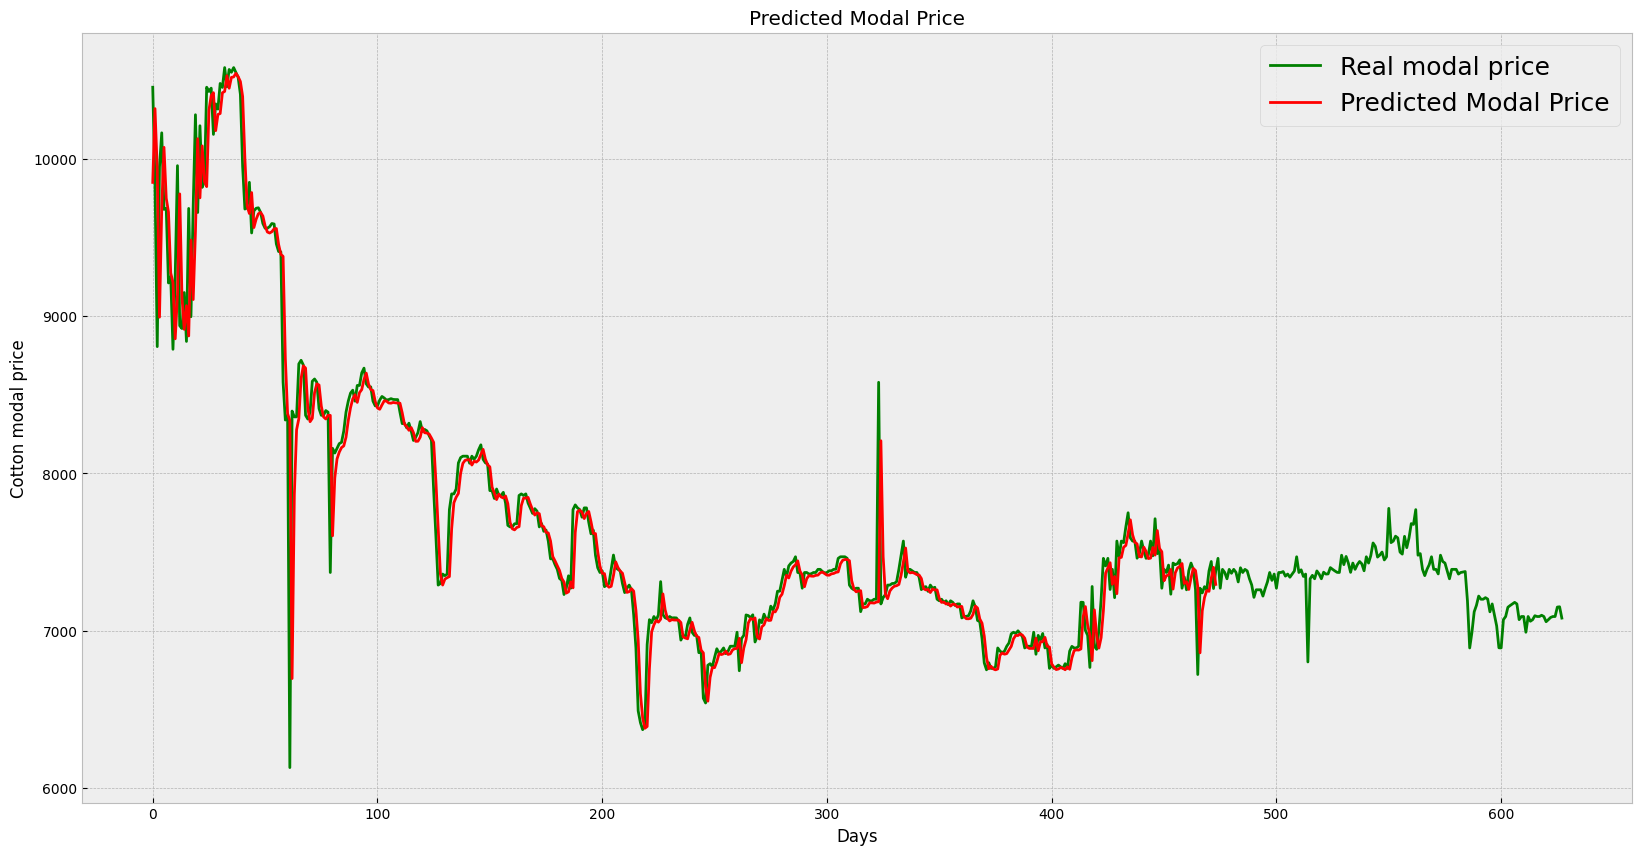

In [23]:
#Plotting the data
plt.figure(figsize=(20,10))
plt.plot(test_set, color= 'green', label = 'Real modal price')
plt.plot(predicted_cotton_price, color = 'red', label = 'Predicted Modal Price')
plt.title('Predicted Modal Price')
plt.xlabel('Days')
plt.ylabel('Cotton modal price')
plt.legend(fontsize=18)
plt.show()

In [24]:
kapas_modal_future = kapas_modal.copy()
last_60_days = kapas_modal_future[-60:]
last_60_days_scaled = sc.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = sc.inverse_transform(pred_price)
print(pred_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[7083.4873]]


In [25]:
def future_prediction(days):
    kapas_modal_future = kapas_modal.copy()
    for i in range(days):
        last_60_days = kapas_modal_future[-60:]
        last_60_days_scaled = sc.transform(last_60_days)
        X_test = []
        X_test.append(last_60_days_scaled)
        X_test = np.array(X_test)
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
        pred_price = regressor.predict(X_test)
        pred_price = sc.inverse_transform(pred_price)
        kapas_modal_future = np.append(kapas_modal_future, pred_price, axis=0)
        future_prices = kapas_modal_future[-days:]
#         print('prediction for day ', i , ": ", pred_price)
    return pred_price

future_prediction(2)
print("Future",future_prediction(2))
print("Pred",pred_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Future [[7076.134]]
Pred [[7083.4873]]


In [26]:
print(future_prediction)

<function future_prediction at 0x000001DA6ED95F80>
